In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [12]:
df = pd.read_excel("ewidencja.xlsx")

In [13]:
hours_df = pd.DataFrame({
    "osoba": ["Michal Bober", "Antoni Jaszcz", "Bartlomiej Pacia", "Bartosz Bugla"],
    "ilość godzin": [0, 0, 0, 0],
    "wyestymowana ilość godzin": [0, 0, 0, 0]
})
hours_df

,osoba,ilość godzin,wyestymowana ilość godzin
0,Michal Bober,0,0
1,Antoni Jaszcz,0,0
2,Bartlomiej Pacia,0,0
3,Bartosz Bugla,0,0


In [14]:
for index, row in df.iterrows():
    who = row["Kto?"]
    hours = round(row["Ilość godzin"], 1)
    estimation = row["Wyestymowana ilość godzin"]
    
    if who == "Wszyscy":
        hours_df["ilość godzin"] += hours
        hours_df["wyestymowana ilość godzin"] += estimation
    
    elif who == "Bartosz Bugla, Michal Bober, Antoni Jaszcz":
        hours_df.loc[hours_df["osoba"] != "Bartłomiej Pacia", "ilość godzin"] += hours
        hours_df.loc[hours_df["osoba"] != "Bartłomiej Pacia", "wyestymowana ilość godzin"] += estimation
        
    
    else:
        hours_df.loc[hours_df["osoba"] == who, "ilość godzin"] += hours
        hours_df.loc[hours_df["osoba"] == who, "wyestymowana ilość godzin"] += estimation

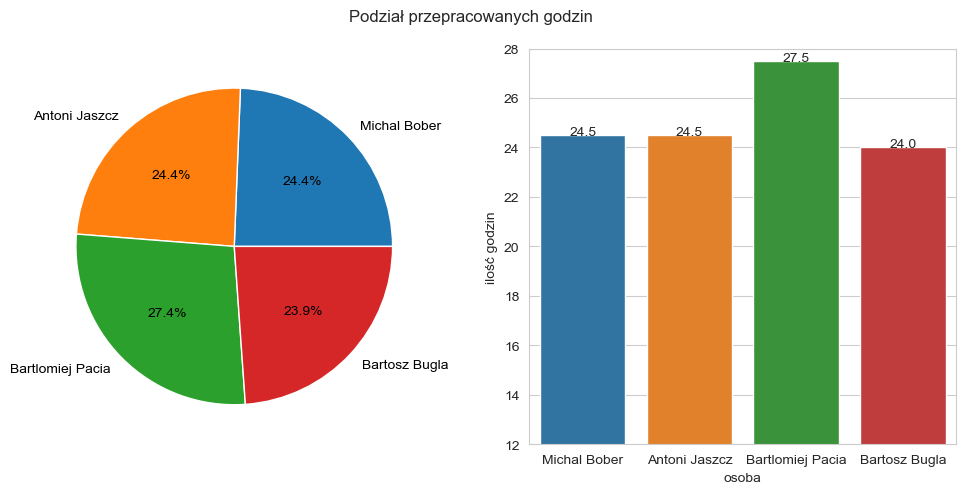

In [19]:
data = hours_df["ilość godzin"]
people = hours_df["osoba"]
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
ax[0].pie(data, autopct='%1.1f%%',textprops={"fontsize": 10, "color": "black"}, labels=people)


ax[1] = sns.barplot(x=people, y=data)
ax[1].set_ylim(0.5 * min(data), ceil(max(data)*1))
addlabels(people, data)
plt.suptitle("Podział przepracowanych godzin")
plt.tight_layout()
plt.show()

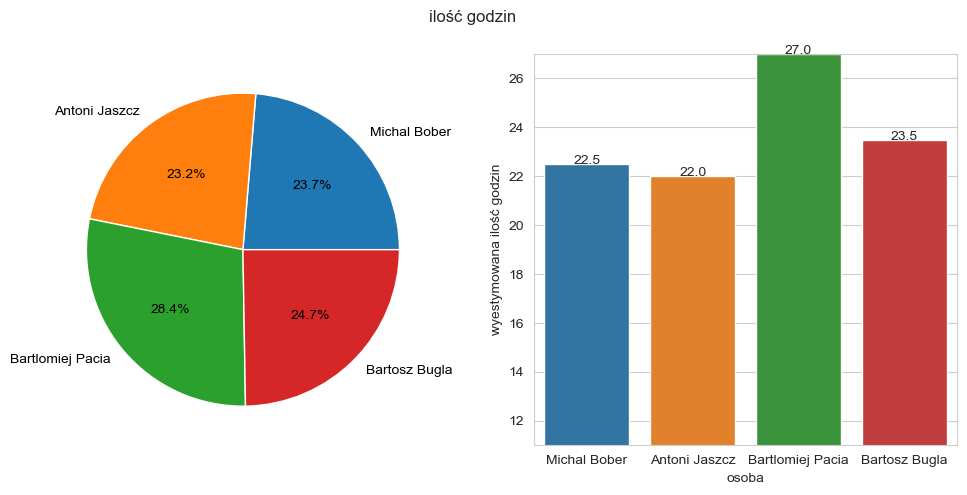

In [20]:
data = hours_df["wyestymowana ilość godzin"]
people = hours_df["osoba"]
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
ax[0].pie(data, autopct='%1.1f%%',textprops={"fontsize": 10, "color": "black"}, labels=people)
ax[1] = sns.barplot(x=people, y=data)
ax[1].set_ylim(0.5 * min(data), ceil(max(data)*1))
addlabels(people, data)
plt.suptitle("ilość godzin")
plt.tight_layout()
plt.show()

In [17]:
all_worked_hours = hours_df["ilość godzin"].sum()
all_estimated_hours = hours_df["wyestymowana ilość godzin"].sum()

In [18]:
print(f"Suma przepracownych godzin: {all_worked_hours}")
print(f"Suma wyestymowanych godzin: {all_estimated_hours}")
print(f"Różnica: {all_worked_hours - all_estimated_hours}, Procentowa różnica: {np.abs(round((all_worked_hours - all_estimated_hours) / all_worked_hours * 100, 2))}%")

Suma przepracownych godzin: 100.5
Suma wyestymowanych godzin: 95.0
Różnica: 5.5, Procentowa różnica: 5.47%


Estymowaliśmy o 5.5 godziny mniej niż przepracowaliśmy. Jest to pomyłka o tylko 5.47% przez co uważamy, że nasze estymacje były bardzo trafne. Wpływ na to mógł mieć fakt, że zadania na ten moment nie były jeszcze tak skomplikowane przez co łatwiej było określić ich skomplikowanie, dodatkowo były one podzielone na mniejsze części przez co ewentualne pomyłki były zminimalizowane. Sądzimy, że różnica między tymi dwoma wartościami będzie się zwiekszała wraz z rozwojem projektu, ponieważ zaczniemy się zajmować coraz bardziej specyficznymi zadaniami, które będą trudniejsze do wyestymowania.
Wiemy natomiast, że powinniśmy zwiększyć ilość estymowanych godzin, w celu próby wyrównania rozbieżności między tymi dwoma wartościami. Dodatkowo planujemy zorganizować tzw. "planning poker" na kolejne etapy projektu. 

Inny sposób jaki możemy zastosować w celu polepszenia estymacji jest zastosowanie następującego wzoru przy wyznaczaniu czasu realizacji zadania:

optymistyczny (O) - możliwie najkrótszy czas realizacji. W tym scenariuszu nie wystąpiły żadne problemy.
pesymistyczny (P) - możliwie najdłuższy czas realizacji. W tym scenariuszu zakładamy, że zaistniały wszystkie zdarzenia, które mogły wydłużyć czas realizacji.
najbardziej prawdopodobny (N) - czas najbardziej spodziewany.
Oczekiwany (E) czas realizacji zadania jest średnią ważoną z podanych czasów (R.K. Wysocki 2013, s. 247)
